# Modelos Preditivos

Um algoritmo de AM preditivo é uma função que, dado um conjunto de exemplos rotulados, constrói um **estimador**

* Se os valores do rótulo forem nominais (strings), tem-se um problema de classificação e o estimador construído é chamado de **classificador**
* Se os valores do rótulo forem valores contínuos infinitos, tem-se um problema de regressão e o estimador construído é chamado de **regressor ou preditor**

O estimador construído (classificador ou preditor) é uma função que recebe um exemplo não conhecido (rotulado) do problema e atribui um rótulo a esse exemplo


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

    Exemplo de problema de classificação:

In [8]:
dfIris = pd.read_csv('iris.csv')

In [9]:
dfIris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


    Exemplo de problema de regressão:

In [10]:
dfCasas = pd.read_csv("casas.csv")

In [11]:
dfCasas

,tamanhoCasa,tamanhoLote,quartos,granito,banheiro,preco
0,3529,9191,6,0,0,205000
1,3247,10061,5,1,1,224900
2,4032,10150,5,0,1,197900
3,2397,14156,4,1,0,189900
4,2200,9600,4,0,1,195000
5,3536,19994,6,1,1,325000
6,2983,9365,5,0,1,230000


# Modelos baseados em distância

https://scikit-learn.org/stable/modules/neighbors.html#classification

O método dos K vizinhos mais próximos, KNN, é um modelo baseado em distância, pois considera a proximidade entre os exemplos para realizar a classificação/predição.

A hipótese que esse tipo de modelo usa é de que dados similares tendem a estar concentrados em uma mesma região no espaço de entrada, da mesma forma, dados que não são similares tendem a estar distantes entre si

Observe o gráfico abaixo para a base de classificação de flores de íris. Os exemplos de uma mesma classe estão representados por uma mesma cor

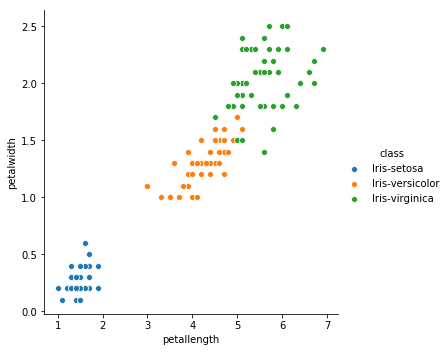

In [12]:
sns.pairplot(x_vars=['petallength'], y_vars=['petalwidth'], data=dfIris, hue='class', height=5)

O algoritmo KNN classifica um novo objeto com base no exemplos do conjunto de treinamento (exemplos conhecidos) que são próximos a ele

É conhecido como algoritmo preguiçoso (lazy), porque não aprende um modelo compacto para os dados, apenas memoriza os objetos conhecidos

Algoritmo de treino:
* Guarde os exemplos conhecidos
    
Algoritmo de classificação/predição:
* Calcule as distâncias do novo exemplo para os exemplos conhecidos
* Classifique o novo exemplo de acordo com a maioria dos k mais próximos (votação simples ou ponderada)
* Em caso de regressão, o novo exemplo será a média dos k vizinhos mais próximos (média simples ou poderada)
    
Parâmetros do KNN:
* K
* Métrica de distância

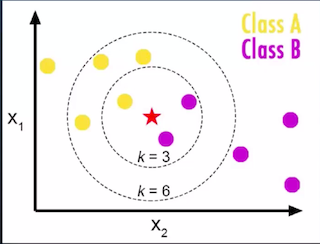

In [45]:
Image('difk.png')

    Observe na imagem acima que dependendo do valor de K, o resultado do estimador será diferente
    
    Em geral o valor de k é ímpar para evitar empates, em caso de classificação
    
    Deve-se testar para cada problema, qual o valor de k mais adequado
    
    Uma estratégia que pode ser adotada é atribuir peso à contribuição do vizinho, ou seja, os mais próximos serão mais significativos na votação (votação ponderada)
    
    No sklearn isso pode ser feito através da palavra-chave weights. O valor default ('uniform'), atribui pesos uniformes a cada vizinho, o valor 'distance' atribui pesos proporcionais ao inverso da distância do exemplo.
    
### Métricas de distância
    
    A métrica de distância serve para calcular a distância entre dois pontos no espaço das entradas, nesse caso, entre um exemplo conhecido e um exemplo novo
    
    A métrica mais usual é a distância euclidiana
    
### Pontos Positivos

* Algoritmo simples
* Algoritmo incremental (novos exemplos podem ser adicionados a qualquer tempo, sem que nenhuma modificação deva ser feita)


### Pontos Negativos

* O algoritmo não obtem uma representação compacta dos exemplos conhecidos
* Custo computacional em caso de bases grandes (cálculo das distâncias)
* Afetado pela presença de atributos redundantes, irrelevantes e em escalas diferentes

O tratamento dos dados (normalização) e a seleção de subconjunto de atributos é recomendada para esse tipo de algoritmo

## Normalizar as variáveis

Como o classificador KNN prediz a classe de uma determinada observação ao identificar as observações mais próximas, a escala da variável é importante. Todas as variáveis que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, sobre o classificador KNN, do que as variáveis em pequena escala.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv("Classified Data",index_col=0)
#index_col=0 faz com que a primeira coluna do arquivo nao seja lida, uma vez que eh uma coluna sem nome, apenas com indices dos exemplos

In [15]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [16]:
pd.DataFrame({'Max':df.max(), 'Min':df.min()}).transpose()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
Max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.0
Min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.0


In [17]:
#inicializa um objeto da classe StandardScaler
normalizador = StandardScaler() 

In [18]:
#chama o método fit, que calcula a média e o desvio padrão a ser usado na normalização
normalizador.fit(df.drop('TARGET CLASS',axis=1)) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
#o método transform faz a normalização dos dados passados por parâmetro
dadosNormalizados = normalizador.transform(df.drop('TARGET CLASS',axis=1))

    Pode usar também o método fit_transform(dados) que faz o cálculo da média e desvio padrão e depois já aplica a normalização

In [20]:
df_Normalizado = pd.DataFrame(dadosNormalizados, columns=df.columns[:-1])

In [21]:
df_Normalizado.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
pd.DataFrame({'Max':df_Normalizado.max(), 'Min':df_Normalizado.min()}).transpose()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
Max,2.667092,2.799904,3.049325,4.151021,2.538987,2.825739,2.940974,2.470109,2.477734,2.602476
Min,-2.678050,-2.618747,-2.275858,-2.775551,-2.947206,-2.660802,-2.620466,-2.674465,-2.701361,-3.542140


## Divisão dos dados para treino e teste

    Treinar um modelo de AM e testá-lo nos mesmos dados é um erro metodológico: um modelo que apenas decoraria os rótulos dos exemplos que acabou de ver teria uma 'acurácia' perfeita, mas não conseguiria prever nada de útil em relação à exemplos novos. 
    
    Essa situação é chamada de overfitting . Para evitá-lo, é prática comum, ao realizar um experimento de aprendizado de máquina (supervisionado), reter parte dos dados disponíveis como um conjunto de testes. Note que a palavra “experimento” não se destina a denotar apenas o uso acadêmico, porque mesmo em ambientes comerciais, o aprendizado de máquina geralmente começa experimentalmente.
    
    No scikit-learn, uma divisão aleatória em conjuntos de treinamento e teste pode ser rapidamente computada com a função train_test_split. 
    

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
from sklearn.model_selection import train_test_split

    Na linha abaixo, passamos como parâmetro os dados de entrada, saída (atributo alvo) e o percentual de dados que deve ser de teste.

    Caso seja passado um número inteiro, o método assumirá que é a quantidade de amostras para teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dadosNormalizados,df['TARGET CLASS'],test_size=0.33)

## KNN no sklearn



In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1) #inicializa o objeto da classe com k = 1

In [27]:
knn.fit(X_train,y_train) #ajusta o modelo com os dados de treinamento

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
pred = knn.predict(X_test) #executa a predição para os dados de teste

## Previsões e avaliações

Vamos avaliar o nosso modelo KNN!

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_test,pred))

[[146  15]
 [ 13 156]]


In [50]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91       161
          1       0.91      0.92      0.92       169

avg / total       0.92      0.92      0.92       330



In [60]:
np.mean(pred == y_test) #acuracia

91.51515151515152

In [62]:
np.mean(pred != y_test) #erro

0.08484848484848485

### Escolhendo um valor K
Vamos em frente e usar o método do cotovelo para escolher um bom Valor K:

In [102]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

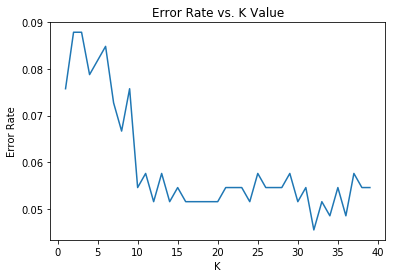

In [103]:
plt.figure()
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Comparação entre k=1 e k=23**

In [67]:
# Agora com K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\nAcuracia:')
print(np.mean(pred == y_test))

WITH K=1

Acuracia:
0.9151515151515152


In [68]:
# Agora com K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\nAcuracia:')
print(np.mean(pred == y_test))

WITH K=23

Acuracia:
0.9424242424242424


## Avaliando o modelo usando validação cruzada

https://scikit-learn.org/stable/modules/cross_validation.html


    Ao avaliar diferentes configurações para o modelo de AM, como o k do KNN, pode-se fazer uso de um método chamado validação cruzada e depois, com a configuração escolhida, proceder o treinamento do modelo e avaliação final com o conjunto de testes, como apresentado na imagem abaixo.


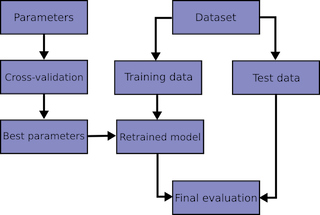

In [101]:
Image('workflow.png')

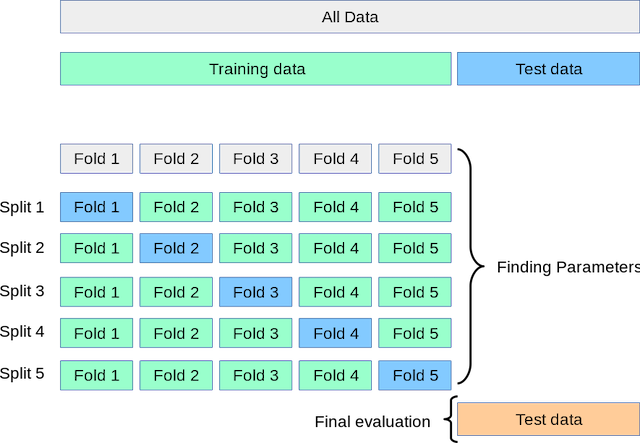

In [29]:
Image('cv.png')

    A medida de desempenho retornada pela validação cruzada k- fold é então a média dos valores calculados no loop. Essa abordagem pode ser computacionalmente cara, mas não desperdiça muitos dados (como é o caso ao fixar um conjunto de validação arbitrário), o que é uma grande vantagem em problemas onde o número de amostras é muito pequeno.

In [31]:
from sklearn.model_selection import cross_val_score

In [93]:
#Usando o cross_val_score para escolher a melhor configuracao para o modelo
scores = cross_val_score(KNeighborsClassifier(n_neighbors=23), X_train, y_train, cv=5)

In [94]:
print("Acurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Acurácia: 0.94 (+/- 0.02)


In [95]:
#Cria o modelo com a configuracao escolhida
knn = KNeighborsClassifier(n_neighbors=23)

In [96]:
#Ajusta o modelo aos dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [97]:
#Testa com os dados de teste
pred = knn.predict(X_test)

In [98]:
#Verifica a acurácia do modelo criado
print("Acurácia: ", np.mean(pred == y_test))

Acurácia:  0.9454545454545454
